In [93]:
# Imports
import numpy as np
import pandas as pd
from tqdm import tqdm  
import random
from sklearn.preprocessing import StandardScaler
%matplotlib inline               
import matplotlib.pyplot as plt

In [ ]:
## LINK TO DATA FOLDER:-https://drive.google.com/drive/folders/1HExaz_W_dHEDSngdqHxW9UAyMazoX6ab?usp=sharing

## Please add it to the same folder as-"Maneuver_Detections"

In [94]:
# Load the TLE data from drive
recent_elset_data = open('data(1)/recent_elset.tle', 'r') 


In [95]:
TLE_first_lines = []
TLE_second_lines = []
TLE_third_lines = []

while True: 
    # Get next line
    line = recent_elset_data.readline()
    if not line: 
        break

    TLE_first_lines.append(line.strip())

    line = recent_elset_data.readline()
    TLE_second_lines.append(line.strip())

    line = recent_elset_data.readline()
    TLE_third_lines.append(line.strip())
  
recent_elset_data.close()

In [96]:
def split(word):
    return [char for char in word]

# Python program to convert a list
# of character  
def convert(s):
  
    # initialization of string to ""
    new = ""
  
    # traverse in the string 
    for x in s:
        new += x 
  
    # return string 
    return new

In [97]:
object_name = []
NORAD_id_list = []
epoch_list = []
inclination_list = []
right_ascension_ascending_node_list = []
eccentricity_list = []
argument_perigee_list = []
first_derivative_mean_motion_list = []
second_derivative_mean_motion_list = []
mean_anomaly_list =[]
mean_motion_list = []
drag_term_list = []
revolution_list = []
year_of_launch_list = []

DEB_label_list = [] 


for i in tqdm(range(len(TLE_first_lines))):
    tle_line1 = TLE_first_lines[i]
    tle_line2 = TLE_second_lines[i]
    tle_line3 = TLE_third_lines[i]
    
    #Object name
    object_name.append(tle_line1)
    
    # DEB_label
    DEB_label_list.append(0) # by default we assume no deb
    tle_line1_ = tle_line1.split()
    for j in range(len(tle_line1_)):
        if tle_line1_[j]=="DEB" or tle_line1_[j] == 'R/B' or tle_line1_[j] == 'COOLANT' or tle_line1[j] == 'FUEL CORE':
            DEB_label_list[i] = 1
            break
    
    tle_line2_ = tle_line2.split()
        
    # YEAR_OF LAUNCH
    year_of_launch = tle_line2_[2]
    year_of_launch_list.append(year_of_launch)
    
    #EPOCH
    epoch = float(tle_line2_[3])
    epoch_list.append(epoch)
    
    # FIRST DERIVATIVE MEAN MOTION(n_dot)
    first_derivative_mean_motion = tle_line2_[4]
    characters = split(first_derivative_mean_motion)
    flag = 0
    num = None
    if characters[0]=="-":
        characters[0] = "-0"
    elif characters[0]=="+":
        characters[0]= "+0"
        
    if characters[-2]=="-":
        num1 = float(convert(characters[:-2]))
        power = -float(characters[-1])
        num = num1*(10**power)
        flag = 1
        
    if characters[-2]=="+":
        num1 = float(convert(characters[:-2]))
        power = +float(characters[-1])
        num = num1*(10**power)
        flag = 1
        
    if flag==0:   
        first_derivative_mean_motion = float(convert(characters))
        first_derivative_mean_motion_list.append(first_derivative_mean_motion)
    else:
        first_derivative_mean_motion = num
        first_derivative_mean_motion_list.append(first_derivative_mean_motion)
        
    
    # SECOND DERIVATIVE MEAN MOTION(n_ddot)
    second_derivative_mean_motion = tle_line2_[5]
    characters = split(second_derivative_mean_motion)
    flag = 0
    num = None
    if characters[0]=="-":
        characters[0] = "-0"
    elif characters[0]=="+":
        characters[0]= "+0"
        
    if characters[-2]=="-":
        num1 = float(convert(characters[:-2]))
        power = -float(characters[-1])
        num = num1*(10**power)
        flag = 1
        
    if characters[-2]=="+":
        num1 = float(convert(characters[:-2]))
        power = +float(characters[-1])
        num = num1*(10**power)
        flag = 1
        
    if flag==0:   
        second_derivative_mean_motion = float(convert(characters))
        first_derivative_mean_motion_list.append(first_derivative_mean_motion)
    else:
        second_derivative_mean_motion = num
        second_derivative_mean_motion_list.append(second_derivative_mean_motion)
    
    # DRAG TERM(B*)
    drag_term = tle_line2_[6]
    characters = split(drag_term)
    flag = 0
    num = None
    if characters[0]=="-":
        characters[0] = "-0"
    elif characters[0]=="+":
        characters[0]= "+0"
        
    if len(characters)>=2 and characters[-2]=="-":
        num1 = float(convert(characters[:-2]))
        power = -float(characters[-1])
        num = num1*(10**power)
        flag = 1
        
    if len(characters)>=2 and characters[-2]=="+":
        num1 = float(convert(characters[:-2]))
        power = +float(characters[-1])
        num = num1*(10**power)
        flag = 1
        
    if flag==0:   
        drag_term = float(convert(characters))
        drag_term_list.append(drag_term)
    else:
        drag_term = num
        drag_term_list.append(drag_term)
    
    tle_line3_ = tle_line3.split()
    
    # NORAD_ID
    norad_id = tle_line3_[1]
    NORAD_id_list.append(norad_id)
    
    # INCLINATION(i)
    inclination = float(tle_line3_[2])
    inclination_list.append(inclination)
    
    # RIGHT ASCENSION OF THE ASCENDING NODE(omega)
    right_ascension_ascending_node = float(tle_line3_[3])
    right_ascension_ascending_node_list.append(right_ascension_ascending_node)
    
    # ECCENTRICITY(e)
    eccentricity = float(tle_line3_[4])*(10**-7)
    eccentricity_list.append(eccentricity)
    
    # ARGUMENT OF PERIGEE()
    argument_perigee = float(tle_line3_[5])
    argument_perigee_list.append(argument_perigee)
    
    # MEAN ANOMANLY(M)
    mean_anomaly = float(tle_line3_[6])
    mean_anomaly_list.append(mean_anomaly)
    
    # MEAN MOTION(n)
    mean_motion = float(tle_line3_[7])
    mean_motion_list.append(mean_motion)
    
    # REVOLUTION(rev)
    mean_motion = mean_motion*(10**16)
    mean_motion = mean_motion%1000000
    mean_motion = int(mean_motion/10)
    revolution = mean_motion
    revolution_list.append(revolution)
    
        

100%|██████████| 20765/20765 [00:00<00:00, 59475.70it/s]


In [98]:
#MAKE CSV FROM ABOVE DATASHEET

dict = {
        'OBJECT_NAME':object_name, 
        'NORAD_ID':NORAD_id_list, 
        'YEAR LAUNCH': year_of_launch_list,
        'EPOCH':epoch_list,
        'INCLINATION(i)': inclination_list,
        'RIGHT ASCENSION ASCENDING NODE(w)':right_ascension_ascending_node_list,
        'ECCENTRICITY(e)': eccentricity_list, 
        'ARGUMENT PERIGEE(omega)': argument_perigee_list, 
        'FIRST DERIVATIVE MEAN MOTION(n_dot)': first_derivative_mean_motion_list,
        'SECOND DERIVATIVE MEAN MOTION(n_ddot)': second_derivative_mean_motion_list, 
        'MEAN ANOMALY(M)': mean_anomaly_list, 
        'MEAN MOTION(n)': mean_motion_list, 
        'DRAG TERM(B*)':drag_term_list,
        'REVOLUTION(rev)':revolution_list,
        'DEB_LABELS': DEB_label_list
       }
                  

dframe = pd.DataFrame(dict)   
dframe.to_csv('/content/drive/MyDrive/SSA/data/recent_elset.csv')


In [99]:
dframe.head()

,OBJECT_NAME,NORAD_ID,YEAR LAUNCH,EPOCH,INCLINATION(i),RIGHT ASCENSION ASCENDING NODE(w),ECCENTRICITY(e),ARGUMENT PERIGEE(omega),FIRST DERIVATIVE MEAN MOTION(n_dot),SECOND DERIVATIVE MEAN MOTION(n_ddot),MEAN ANOMALY(M),MEAN MOTION(n),DRAG TERM(B*),REVOLUTION(rev),DEB_LABELS
0,0 VANGUARD 1,5,58002B,21042.550355,34.2457,211.6733,0.184707,348.3317,-8.900000e-07,0.0,7.9494,10.848569,-10.5760,13249,0
1,0 VANGUARD 2,00011,59001A,21042.875208,32.8652,236.4804,0.146771,163.1695,2.500000e-06,0.0,202.3396,11.857480,12.3720,34028,0
2,0 VANGUARD R/B,12,59001B,21043.485580,32.9086,231.1096,0.166686,257.9454,9.700000e-07,0.0,83.0223,11.443932,3.5182,548,0
3,0 VANGUARD R/B,00016,58002A,21042.694439,34.2578,183.9708,0.202246,166.4147,2.400000e-07,0.0,200.0337,10.486923,2.9897,39499,0
4,0 VANGUARD 3,20,59007A,21043.437696,33.3449,47.0561,0.166567,99.8465,4.900000e-07,0.0,279.3422,11.557979,2.6295,84140,0


In [100]:
scalar = StandardScaler()
scalar.fit(dframe.drop(['OBJECT_NAME', 'NORAD_ID', 'YEAR LAUNCH', 'EPOCH','DEB_LABELS'], axis=1))
scaled_features = scalar.transform(dframe.drop(['OBJECT_NAME', 'NORAD_ID', 'YEAR LAUNCH', 'EPOCH','DEB_LABELS'], axis=1))
dframe_features = pd.DataFrame(scaled_features, columns=dframe.columns[4:-1])
dframe_features.head()

,INCLINATION(i),RIGHT ASCENSION ASCENDING NODE(w),ECCENTRICITY(e),ARGUMENT PERIGEE(omega),FIRST DERIVATIVE MEAN MOTION(n_dot),SECOND DERIVATIVE MEAN MOTION(n_ddot),MEAN ANOMALY(M),MEAN MOTION(n),DRAG TERM(B*),REVOLUTION(rev)
0,-1.251714,0.455001,0.605053,1.680974,-0.014189,-0.020346,-1.634418,-0.170555,0.011874,-0.703223
1,-1.297277,0.689813,0.399555,-0.100146,-0.013904,-0.020346,0.164270,0.037514,0.020108,-0.084917
2,-1.295845,0.638975,0.507434,0.811527,-0.014033,-0.020346,-0.939770,-0.047773,0.016931,-1.081157
3,-1.251314,0.192783,0.700055,-0.068930,-0.014094,-0.020346,0.142934,-0.245137,0.016741,0.077880
4,-1.281445,-1.103182,0.506789,-0.709266,-0.014073,-0.020346,0.876774,-0.024252,0.016612,1.406229


In [101]:
matrix_data = dframe_features.to_numpy()
print(matrix_data)

[[-1.25171385  0.45500101  0.60505301 ... -0.1705549   0.01187373
  -0.70322259]
 [-1.29727717  0.68981253  0.39955485 ...  0.03751389  0.02010752
  -0.08491699]
 [-1.29584476  0.63897524  0.50743372 ... -0.0477725   0.01693076
  -1.08115701]
 ...
 [ 0.97819898  0.26368062 -0.29385827 ...  0.26907667  0.01566842
  -1.09746345]
 [ 0.33898569  1.56765022 -0.34120942 ...  0.10171958  0.01566842
  -1.09746345]
 [ 0.59798536  1.48781255 -0.37995748 ...  0.26311503  0.01566842
  -1.09746345]]


In [102]:
from sklearn.decomposition import PCA

In [103]:
pca=PCA(n_components=10)

In [104]:
pca.fit(matrix_data)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [105]:
x_pca=pca.transform(matrix_data)

In [106]:
matrix_data.shape

(20765, 10)

In [107]:
x_pca.shape

(20765, 10)

Text(0, 0.5, 'Second principle component')

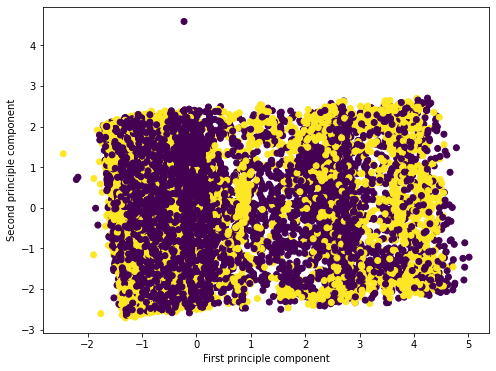

In [108]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=DEB_label_list)
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

In [109]:
print(pca.components_)
print(pca.explained_variance_)

[[-0.57328536  0.1082096   0.48679827  0.06194114  0.0022291  -0.00191397
  -0.05808411 -0.59847013  0.02353447 -0.23816498]
 [-0.06315456  0.05580643  0.02528593 -0.70297375  0.02214757 -0.00887573
   0.70088655 -0.01914964 -0.00437797 -0.07673686]
 [ 0.02677916  0.42088942  0.0741643   0.02209938  0.50089446  0.15473715
   0.01397703  0.01194062  0.66244056  0.31959658]
 [-0.02279813 -0.33012513 -0.08760024  0.01071216  0.44000621  0.75120521
  -0.00251772  0.01690068 -0.13005966 -0.32800437]
 [-0.02742417 -0.60214559  0.00186982  0.02002796  0.52026008 -0.57514671
   0.03316327 -0.04126597  0.16121092 -0.0775116 ]
 [ 0.02019306  0.19581154  0.1845485  -0.02996227  0.44549635 -0.0615636
  -0.01833136 -0.05272948 -0.69874534  0.48236463]
 [-0.02915196  0.5415354  -0.29537927  0.0232396   0.2925155  -0.27697542
  -0.09088237  0.14419301 -0.16249411 -0.63274348]
 [ 0.52484927  0.02689724  0.7619968  -0.00321348  0.00796752 -0.01886118
  -0.01139409  0.23937516  0.01160109 -0.29184966]
 

In [110]:
variance = pca.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features

array([ 23.2,  39. ,  49.8,  59.9,  69.8,  79.2,  88.4,  93.8,  98. ,
       100. ])

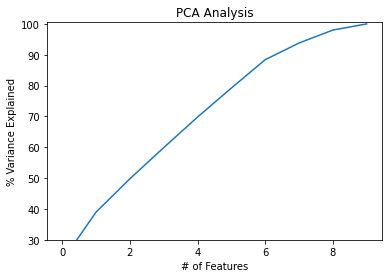

In [111]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var)